# 数据可视化-Seaborn简易入门

Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。

seaborn是针对统计绘图的，一般来说，seaborn能满足数据分析90%的绘图需求。

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，应该把Seaborn视为matplotlib的补充，而不是替代物。

用matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。


### seaborn一共有5个大类21种图，分别是：

* Relational plots 关系类图表
    1. relplot() 关系类图表的接口，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图
    2. scatterplot() 散点图
    3. lineplot() 折线图

* Categorical plots 分类图表
    1. catplot() 分类图表的接口，其实是下面八种图表的集成，，通过指定kind参数可以画出下面的八种图
    2. stripplot() 分类散点图
    3. swarmplot() 能够显示分布密度的分类散点图
    4. boxplot() 箱图
    5. violinplot() 小提琴图
    6. boxenplot() 增强箱图
    7. pointplot() 点图
    8. barplot() 条形图
    9. countplot() 计数图

* Distribution plot 分布图
    1. jointplot() 双变量关系图
    2. pairplot() 变量关系组图
    3. distplot() 直方图，质量估计图
    4. kdeplot() 核函数密度估计图
    5. rugplot() 将数组中的数据点绘制为轴上的数据

* Regression plots 回归图
    1. lmplot() 回归模型图
    2. regplot() 线性回归图
    3. residplot() 线性回归残差图

* Matrix plots 矩阵图
    1. heatmap() 热力图
    2. clustermap() 聚集图


In [1]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

有一套的参数可以控制绘图元素的比例。

首先，让我们通过`set()`重置默认的参数：

有五种seaborn的风格，它们分别是：`darkgrid`, `whitegrid`, `dark`, `white`, `ticks`。它们各自适合不同的应用和个人喜好。默认的主题是`darkgrid`。


In [2]:
sns.set(style="ticks")

In [3]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


seaborn内置了不少样例数据，为dataframe类型，
`df = sns.load_dataset("anscombe")`即读取“`anscombe`”样例数据，如果要查看数据，可以使用类似`df.head()`命令查看

##  lmplot(回归图)

lmplot是用来绘制回归图的，通过lmplot我们可以直观地总览数据的内在关系。

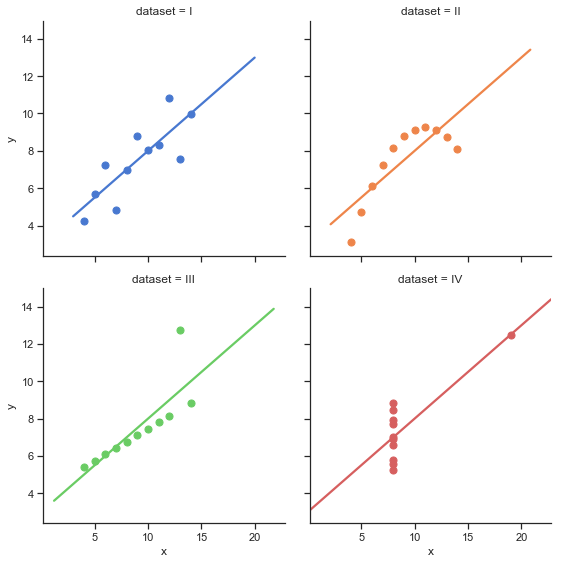

In [5]:
"""
Anscombe's quartet
==================
"""
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

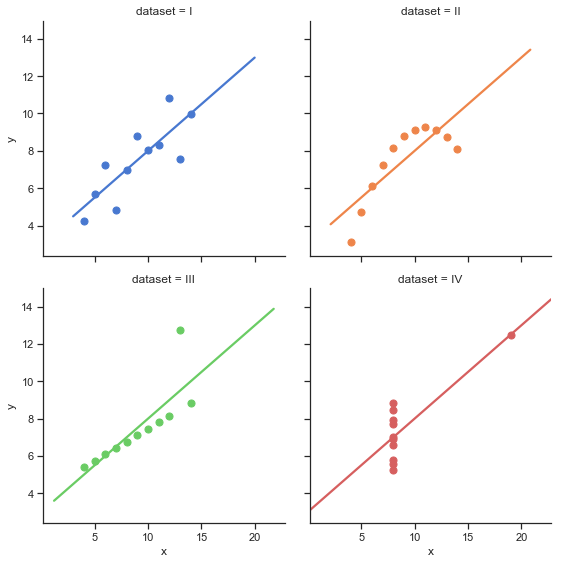

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

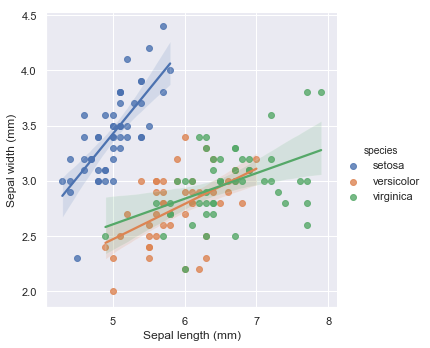

In [7]:
"""
Multiple linear regression
==========================

"""
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")


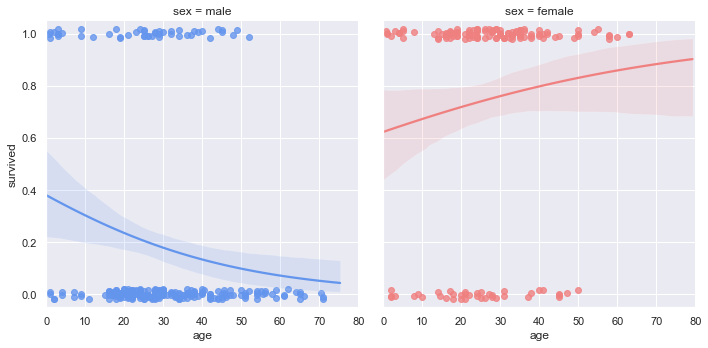

In [8]:
"""
Faceted logistic regression
===========================

"""
# import statsmodels.api as sm 
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

##  kdeplot(核密度估计图)
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：

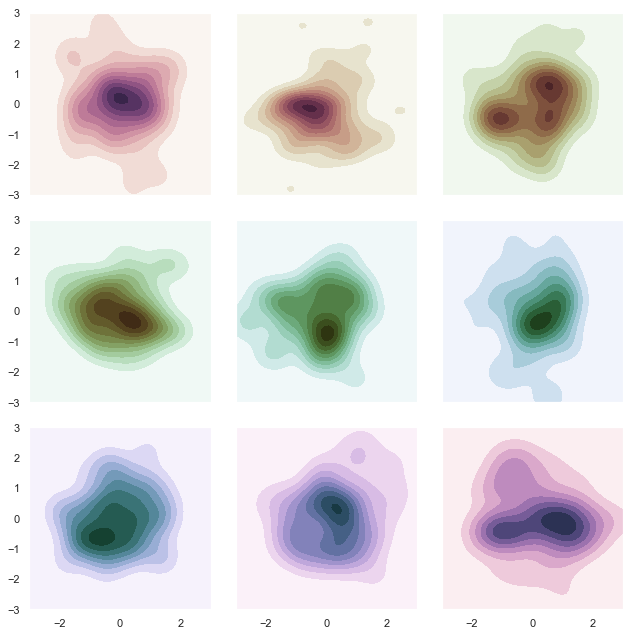

In [9]:
"""
Different cubehelix palettes
============================

"""

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()


Text(3.8,4.5,'setosa')

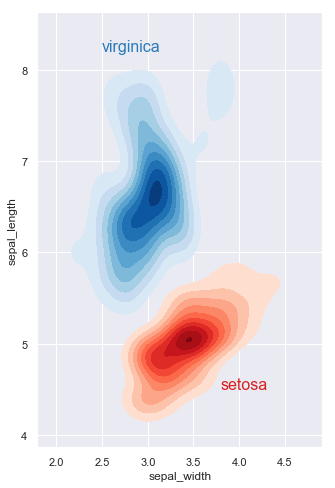

In [10]:
"""
Multiple bivariate KDE plots
============================
"""
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

## FacetGrid 
是一个绘制多个图表（以网格形式显示）的接口。

步骤：

1、实例化对象

2、map，映射到具体的 seaborn 图表类型

3、添加图例

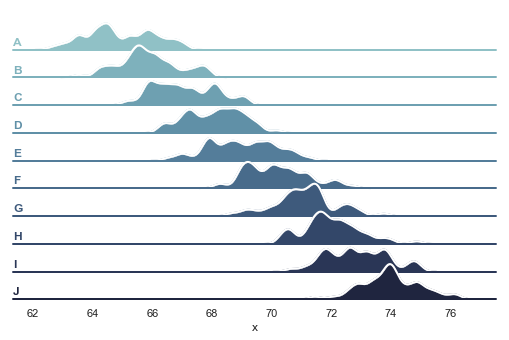

In [11]:
"""
Overlapping densities ('ridge plot')
====================================
"""
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

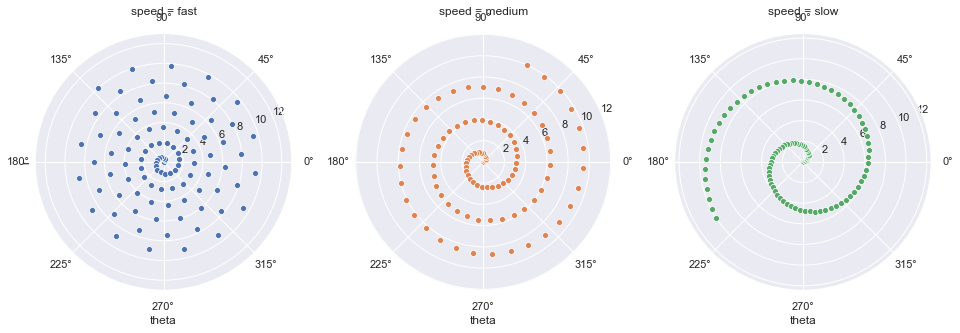

In [12]:
"""
FacetGrid with custom projection
================================

"""
sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

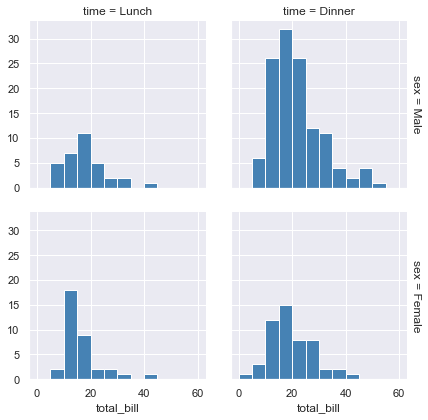

In [13]:
"""
Facetting histograms by subsets of data
=======================================

"""
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

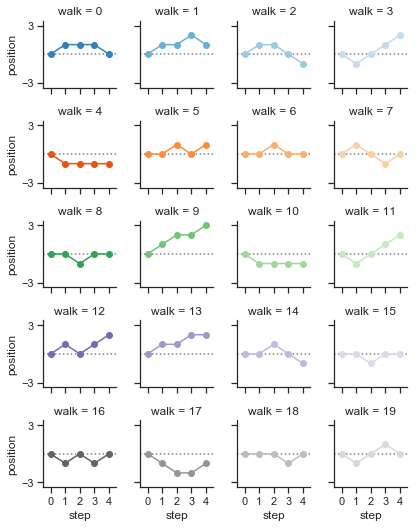

In [14]:
"""
Plotting on a large number of facets
====================================

"""
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

##  distplot(单变量分布直方图)
在seaborn中想要对单变量分布进行快速了解最方便的就是使用`distplot()`函数，默认情况下它将绘制一个直方图，并且可以同时画出核密度估计(KDE)。

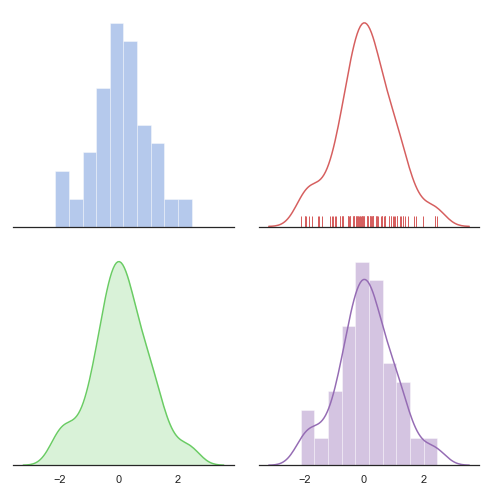

In [15]:
"""
Distribution plot options
=========================

"""
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## lineplot
绘制线段

seaborn里的lineplot函数所传数据必须为一个pandas数组，这一点跟matplotlib里有较大区别，并且一开始使用较为复杂，`sns.lineplot`里有几个参数值得注意。

x: plot图的x轴label

y: plot图的y轴label

ci: 与估计器聚合时绘制的置信区间的大小

data: 所传入的pandas数组

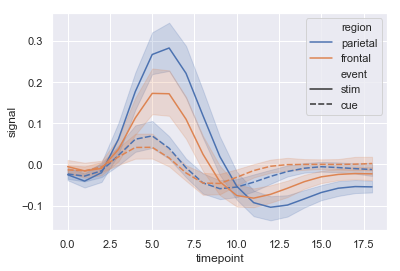

In [16]:
"""
Timeseries plot with error bands
================================

"""
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


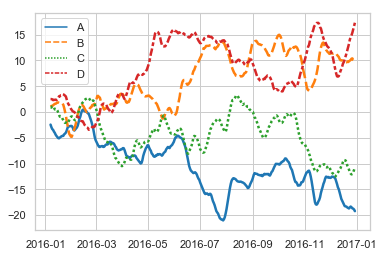

In [17]:
"""
Lineplot from a wide-form dataset
=================================

"""

sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## relplot
这是一个图形级别的函数，它用散点图和线图两种常用的手段来表现统计关系。

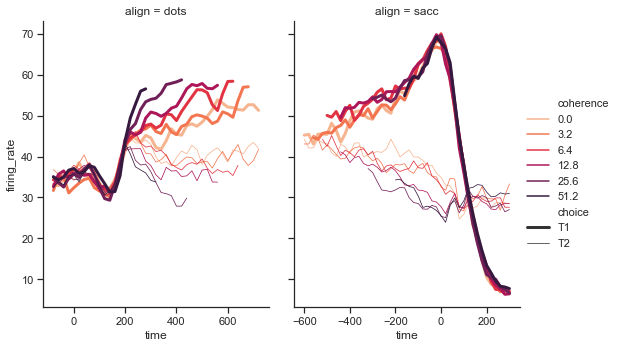

In [18]:
"""
Line plots on multiple facets
=============================

"""

sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)


## boxplot
箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。

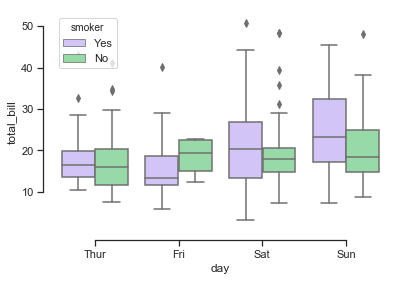

In [19]:
"""
Grouped boxplots
================
"""
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

## violinplot
violinplot与boxplot扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征。

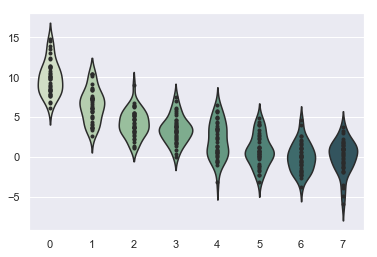

In [20]:
"""
Violinplots with observations
=============================

"""


sns.set()

# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="points")

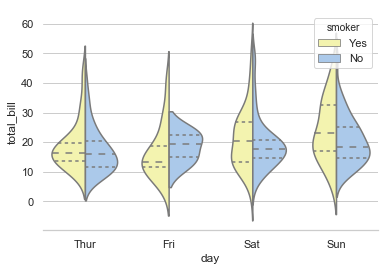

In [21]:
"""
Grouped violinplots with split violins
======================================
"""
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

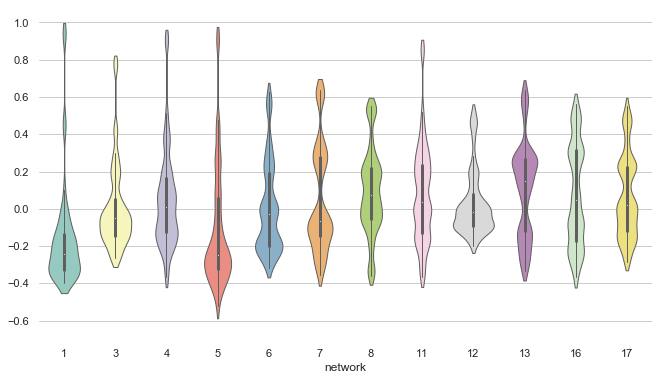

In [22]:
"""
Violinplot from a wide-form dataset
===================================

"""

sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## heatmap热力图
利用热力图可以看数据表里多个特征两两的相似度。

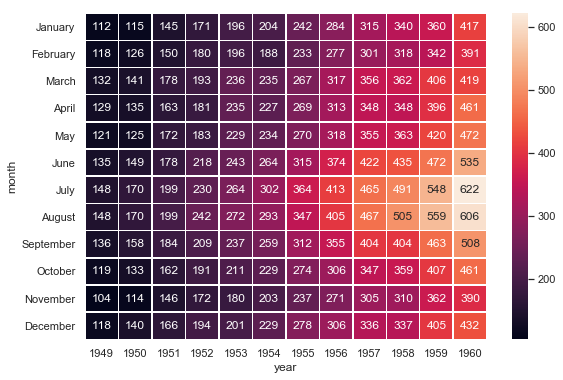

In [23]:
"""
Annotated heatmaps
==================

"""
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

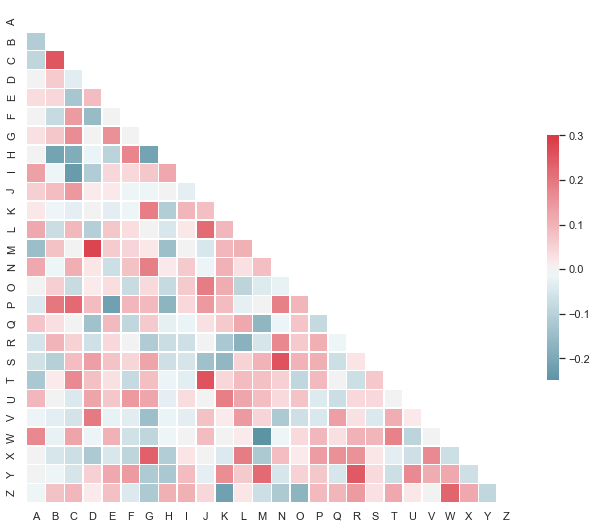

In [24]:
"""
Plotting a diagonal correlation matrix
======================================

"""
from string import ascii_letters

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## jointplot
用于2个变量的画图

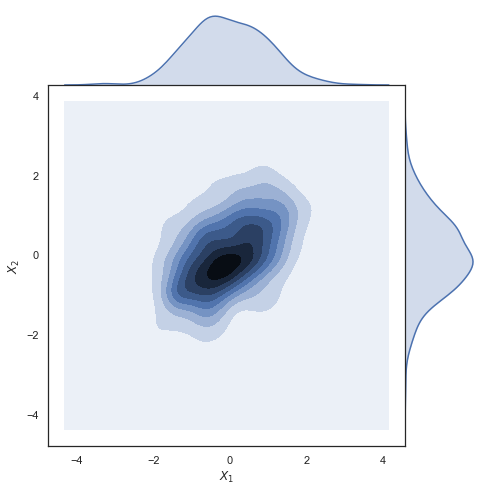

In [25]:
"""
Joint kernel density estimate
=============================
"""
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

HexBin图

直方图的双变量类似物被称为“hexbin”图，因为它显示了落在六边形仓内的观测数。该图适用于较大的数据集。

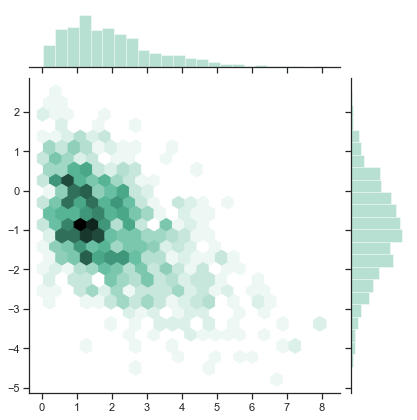

In [26]:
"""
Hexbin plot with marginal distributions
=======================================
"""
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

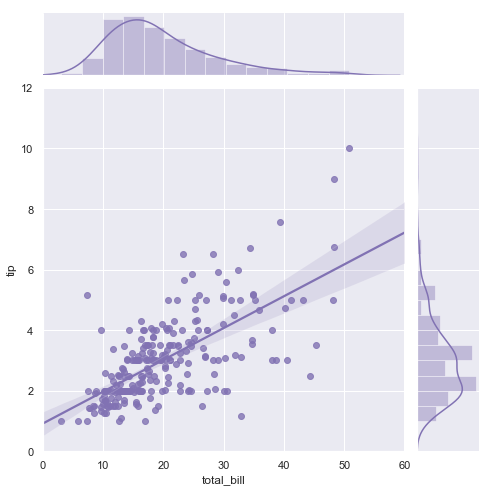

In [27]:
"""
Linear regression with marginal distributions
=============================================

"""

sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)


## barplot(条形图)
条形图表示数值变量与每个矩形高度的中心趋势的估计值，并使用误差线提供关于该估计值附近的不确定性的一些指示。

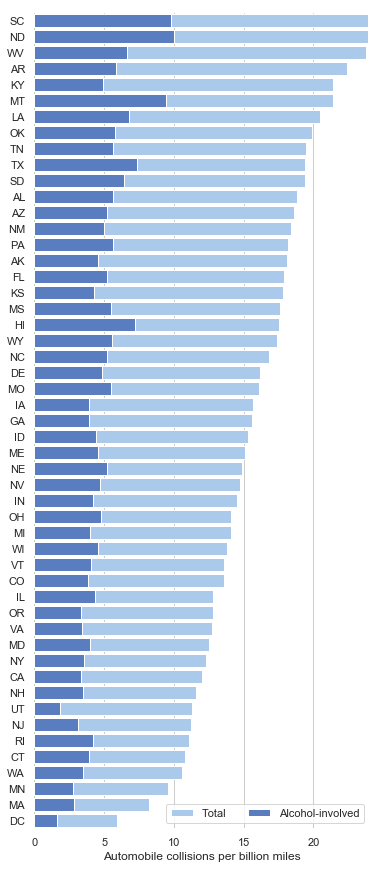

In [28]:
"""
Horizontal bar plots
====================
"""
sns.set(style="whitegrid")

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

## catplot
分类图表的接口，通过指定kind参数可以画出下面的八种图

stripplot() 分类散点图

swarmplot() 能够显示分布密度的分类散点图

boxplot() 箱图

violinplot() 小提琴图

boxenplot() 增强箱图

pointplot() 点图

barplot() 条形图

countplot() 计数图

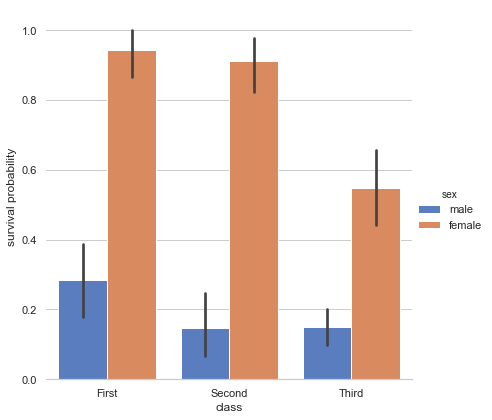

In [29]:
"""
Grouped barplots
================
"""
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

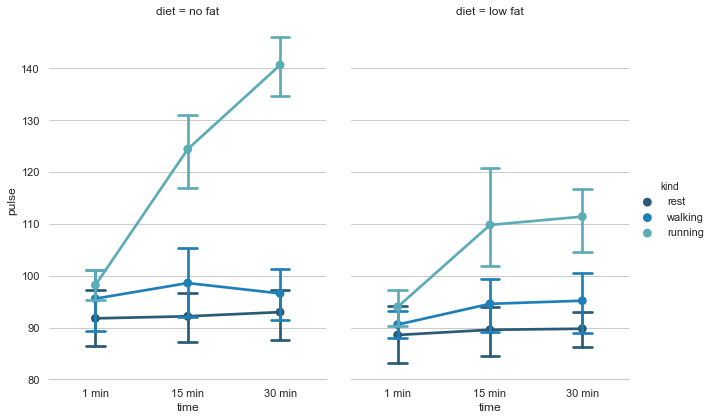

In [30]:
"""
Plotting a three-way ANOVA
==========================

"""

sns.set(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

## pointplot
点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。点图可能比条形图更有用于聚焦一个或多个分类变量的不同级别之间的比较。他们尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易。


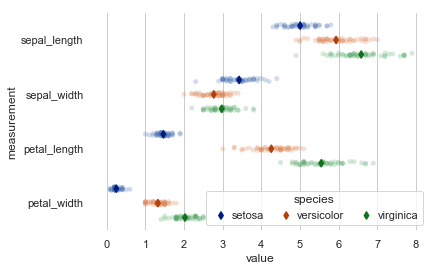

In [31]:
"""
Conditional means with observations
===================================

"""
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

## scatterplot(散点图)

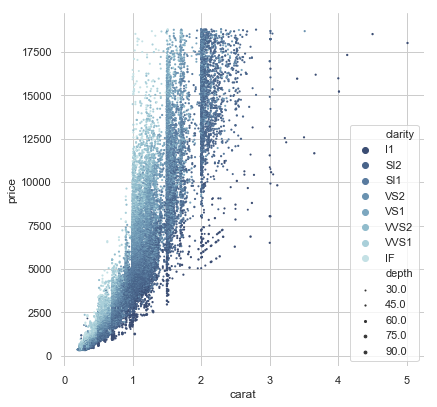

In [32]:
"""
Scatterplot with categorical and numerical semantics
====================================================
"""
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

## boxenplot（增强箱图）

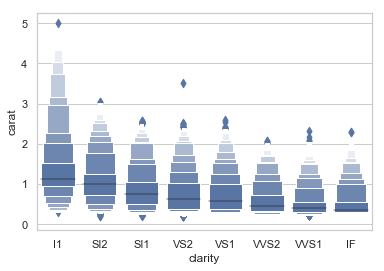

In [33]:
"""
Plotting large distributions
============================

"""
sns.set(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)


## Scatterplot（散点图）

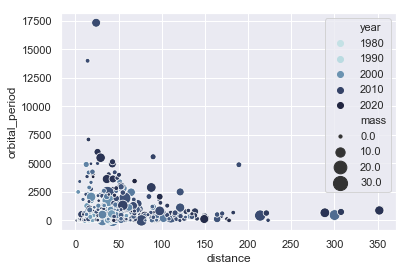

In [34]:
"""
Scatterplot with continuous hues and sizes
==========================================

"""

sns.set()

# Load the example iris dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)


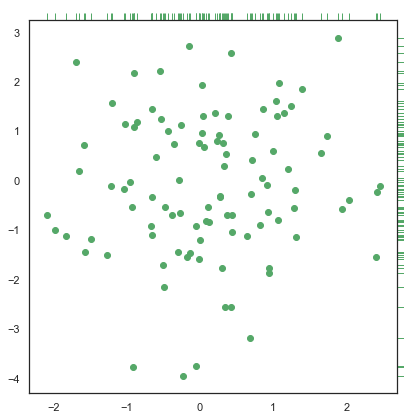

In [35]:
"""
Scatterplot with marginal ticks
===============================
"""
sns.set(style="white", color_codes=True)

# Generate a random bivariate dataset
rs = np.random.RandomState(9)
mean = [0, 0]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T

# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y, space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")


## PairGrid
用于绘制数据集中成对关系的子图网格。

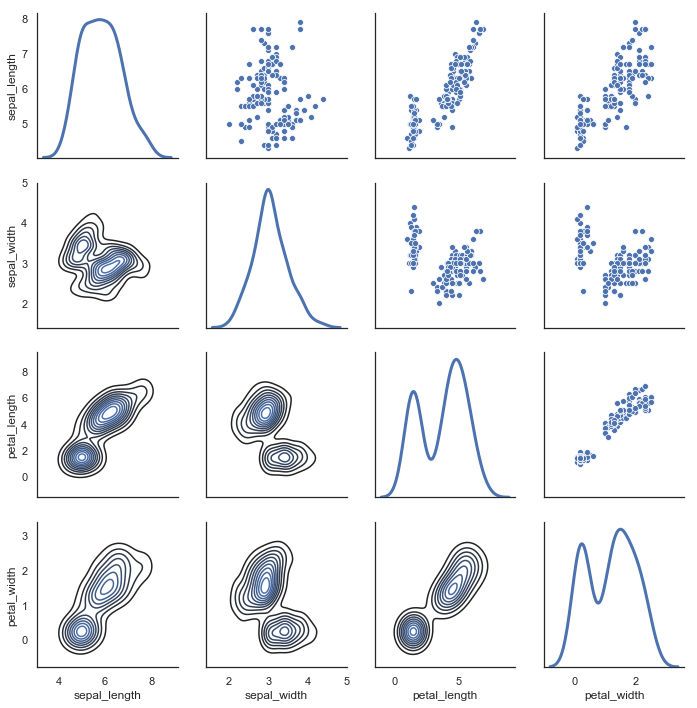

In [36]:
"""
Paired density and scatterplot matrix
=====================================

"""

sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)


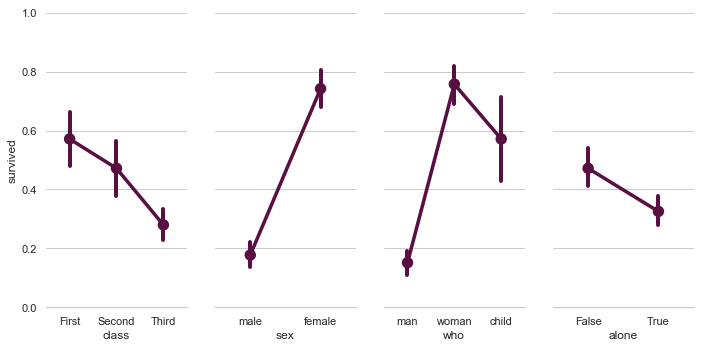

In [37]:
"""
Paired categorical plots
========================

"""
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)


## residplot
线性回归残差图

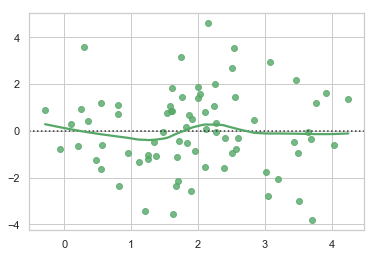

In [38]:
"""
Plotting model residuals
========================

"""

sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")


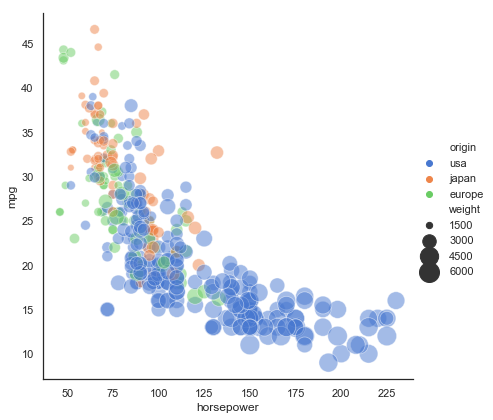

In [39]:
"""
Scatterplot with varying point sizes and hues
==============================================

"""
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

## swarmplot
能够显示分布密度的分类散点图

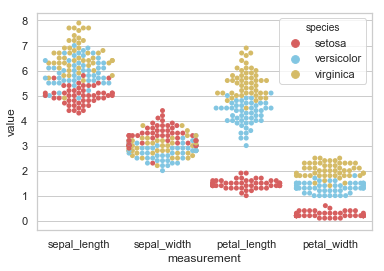

In [40]:
"""
Scatterplot with categorical variables
======================================

"""

sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)


## pairplot
变量关系组图

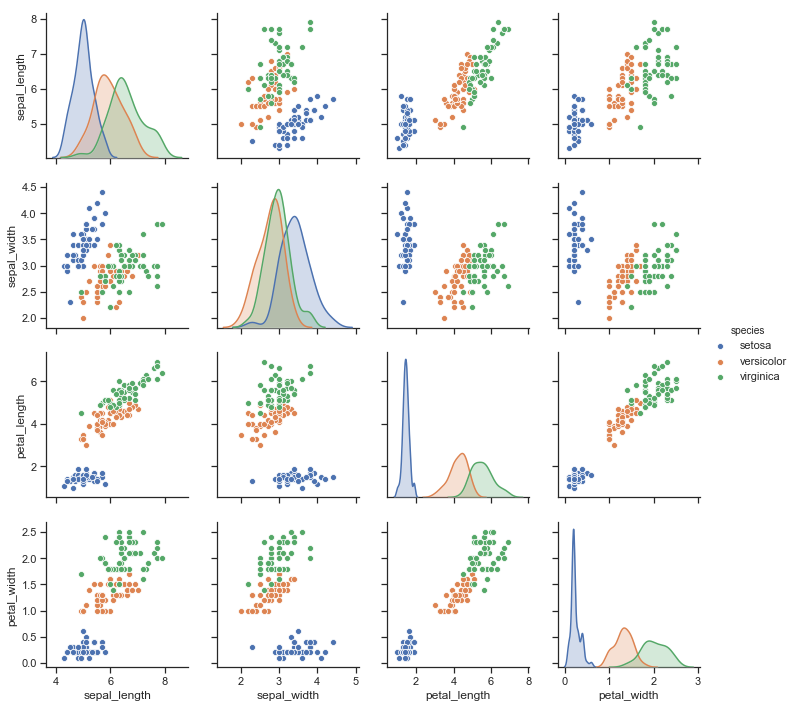

In [41]:
"""
Scatterplot Matrix
==================

"""

sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")


## clustermap
聚集图

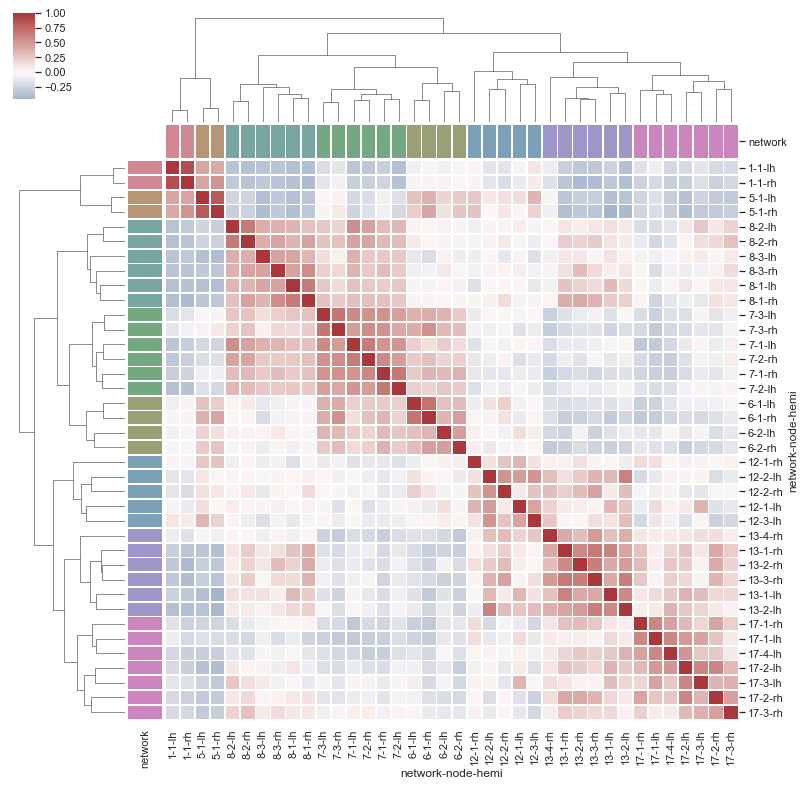

In [42]:
"""
Discovering structure in heatmap data
=====================================

"""

sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
